In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### importing AI libraries

In [2]:
from statsmodels.tsa.arima.model import ARIMA

# Import data from file

In [3]:
beer_cons = pd.read_csv("Consumo_cerveja.csv")

# Data exploration

In [4]:
beer_cons.head(10)





,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


In [5]:
beer_cons.tail(10)


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We noticed there were a lot of missing values towards the end of the data frame. By visual inspection of the original file, we confirmed the were only 365 rows. Empty lines were identified at the end, and improper deletion of previous data was probably 

In [6]:
last_row_value = 365
beer_cons.iloc[last_row_value:].isna().all().all()

True

In [7]:
beer_cons.dropna(inplace=True)
beer_cons

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [8]:
beer_cons.shape


(365, 7)

In [9]:
beer_cons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


#### We notice the first 5 columns of the data frame were loaded as strings which is incorrect if we want to evaluate them as numerical, so we need to replace to commas to "." so they are converted to floats except the first column witch correspondes to the date and needs to be converted to datetime format

#### The column names were in Portuguese so we also translate them to English

In [10]:
string_columns = beer_cons.select_dtypes(include=["object"]).columns.to_list()
string_columns.remove("Data")
string_columns

['Temperatura Media (C)',
 'Temperatura Minima (C)',
 'Temperatura Maxima (C)',
 'Precipitacao (mm)']

In [11]:
for column in string_columns:
    beer_cons[column] = beer_cons[column].str.replace(",", ".")
    beer_cons[column] = beer_cons[column].astype(float)
beer_cons

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [12]:
beer_cons["Data"] = pd.to_datetime(beer_cons["Data"])


In [13]:
beer_cons.columns = ["Date", "Average Weather Temp.", "Minimum Weather Temp.", "Maximum Weather Temp.", "Precipitation", "Weekend", "Beer Consumption"]

In [14]:
beer_cons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   365 non-null    datetime64[ns]
 1   Average Weather Temp.  365 non-null    float64       
 2   Minimum Weather Temp.  365 non-null    float64       
 3   Maximum Weather Temp.  365 non-null    float64       
 4   Precipitation          365 non-null    float64       
 5   Weekend                365 non-null    float64       
 6   Beer Consumption       365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


In [15]:
beer_cons.describe(include="all")

,Date,Average Weather Temp.,Minimum Weather Temp.,Maximum Weather Temp.,Precipitation,Weekend,Beer Consumption
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2015-07-02 00:00:00,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
min,2015-01-01 00:00:00,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,2015-04-02 00:00:00,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,2015-07-02 00:00:00,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,2015-10-01 00:00:00,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,2015-12-31 00:00:00,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143


#### For the Date we can see the earliest date is 1/Jan 2015 and the last date is 31/Dec 2016 column Avg, so we can conclude all the data we have corresponds to 2015. 
#### The Avg. Temp in Celsius is 21 degrees, the minimum registered temp is 12.9 and the max is 28.8, which is not very common for a Brazilian city like Sao Paulo, where temp can sometimes rise to over 40 degrees. The Std of this column is 3 degrees so we can expect a variance of - 3 degrees from mean or + 3 degrees.
#### On average the Minimum Temperature registered was 17.4 degrees while the minimum was 10 degrees and the max was 24.5 with std 2.8 degrees
#### the Maximum Temperature in SP was 36.5 while the lower max temp was 14.5 degrees and the average was 26.6 with std 4.3
#### Checking the Precipitation column we see a count of 365 and someone can wrongfully assume that it rained every day which would be a nightmare for Brazilians. After inspections we see that is not the case since the minimum precipitation value is 0 so we can see that on some days it didn't rain. The max value for the precipitation was 94.8mm and the mean was 5.2mm which makes sense for Brazilian weather. The std is 12.4mm
#### The column weekend is a binary column containing only 2 values 0 and 1 to indicate is was weekend or not
#### On dataset page there's no information about the beer consumption per person but we assume the mean of 25.4L is too much for one person per day so we assume is probably for a group of people. Since they mention the data was collected in a university area. The max value was 37.9L per day and the min was 14.3L and the sdt is 4.4L

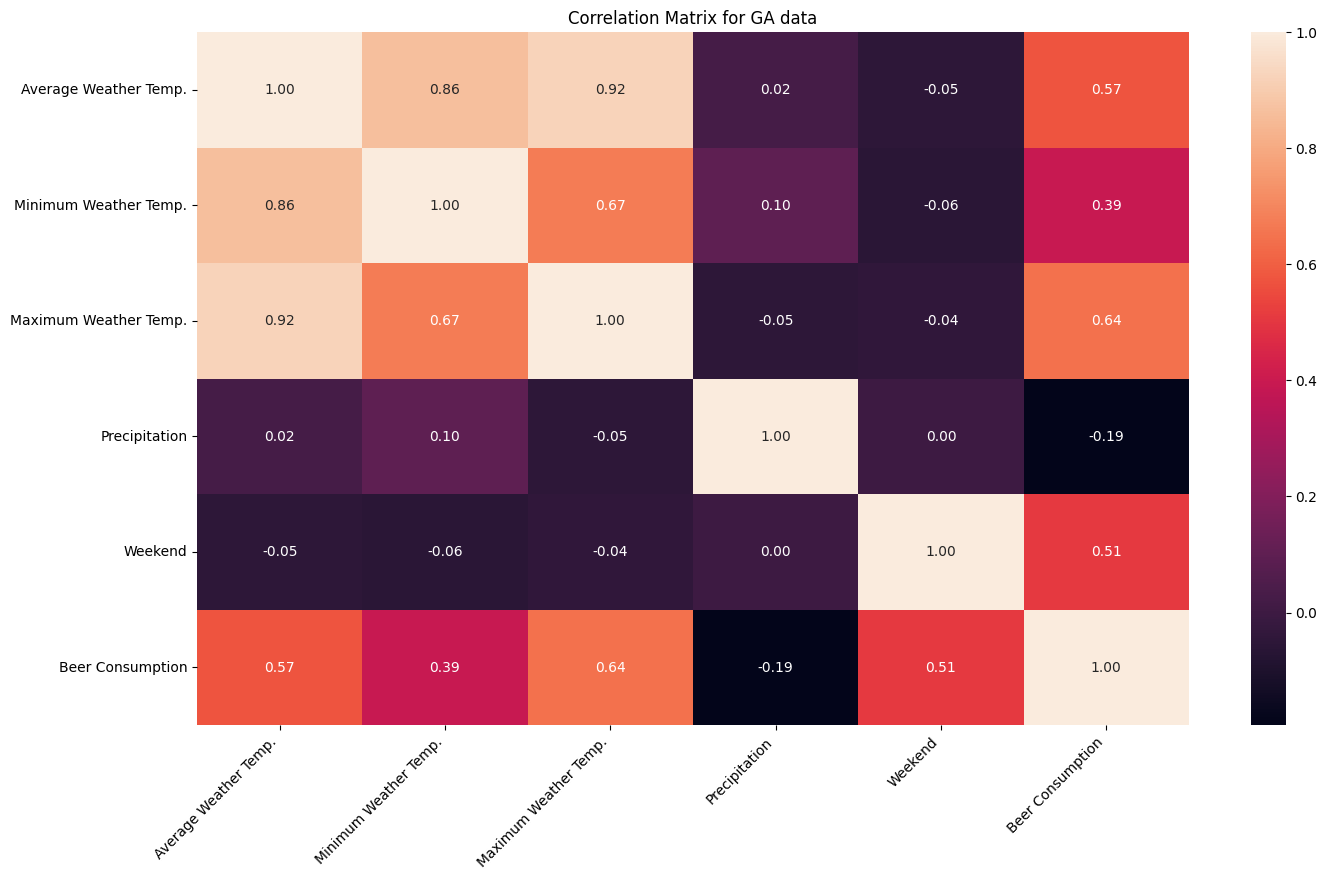

In [16]:
corr_matrix = beer_cons.corr(numeric_only=True)
plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix for GA data")
plt.xticks(rotation=45, ha="right")
plt.show()


#### All temp. Columns show a high correlation with each other, which makes sense because they all have the same temperature. metric.
#### Beer consumption shows a correlation of 57% with Avg. daily temp. witch might indicate our hipotesis that the temp has an influence on the amount of beer consumed. Temp min and max. also indicate high influence on beer consumption confirming the hipoteses. This correlation is positive, the highter the temp, more beer is consumed. 
#### Precipitation show an inverse relationship, with more rain less beer is consumed 
#### Weekends have more than 50% influence on beer consumption
#### All these conclusions make sense but we will make a in-depth analysis to get to know more about the results

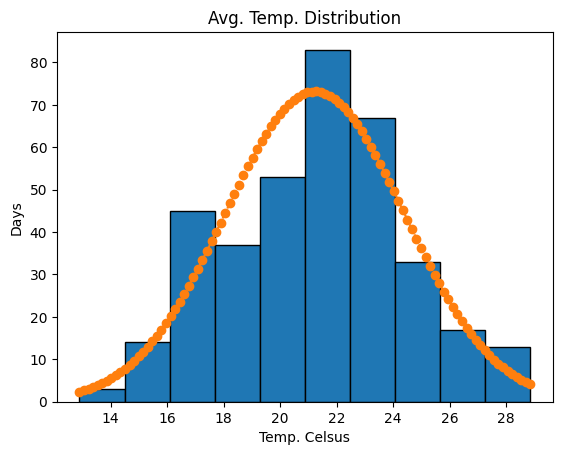

In [52]:
count,bins, patches = plt.hist(beer_cons["Average Weather Temp."], bins=10, edgecolor="black")
(mu,sigma) = norm.fit(beer_cons["Average Weather Temp."])
x = np.linspace(bins[0], bins[-1], 100)
y = norm.pdf(x,mu,sigma)* len(beer_cons["Average Weather Temp."]) * (bins[1] - bins[0])
plt.plot(x, y, "o--")
plt.xlabel("Temp. Celsus")
plt.ylabel("Days")
plt.title("Avg. Temp. Distribution")
plt.show()

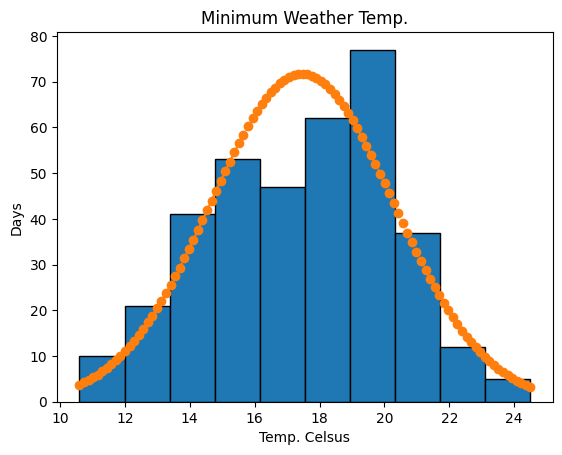

In [55]:
count,bins, patches = plt.hist(beer_cons["Minimum Weather Temp."], bins=10, edgecolor="black")
(mu,sigma) = norm.fit(beer_cons["Minimum Weather Temp."])
x = np.linspace(bins[0], bins[-1], 100)
y = norm.pdf(x,mu,sigma)* len(beer_cons["Minimum Weather Temp."]) * (bins[1] - bins[0])
plt.plot(x, y, "o--")
plt.xlabel("Temp. Celsus")
plt.ylabel("Days")
plt.title("Minimum Weather Temp.")
plt.show()

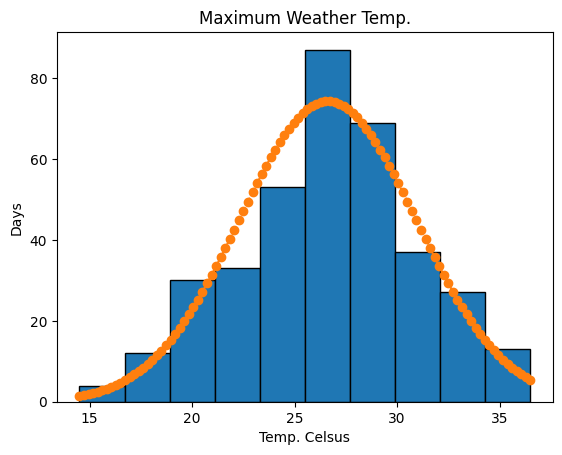

In [56]:
count,bins, patches = plt.hist(beer_cons["Maximum Weather Temp."], bins=10, edgecolor="black")
(mu,sigma) = norm.fit(beer_cons["Maximum Weather Temp."])
x = np.linspace(bins[0], bins[-1], 100)
y = norm.pdf(x,mu,sigma)* len(beer_cons["Average Weather Temp."]) * (bins[1] - bins[0])
plt.plot(x, y, "o--")
plt.xlabel("Temp. Celsus")
plt.ylabel("Days")
plt.title("Maximum Weather Temp.")
plt.show()

#### For all temperature distributions we fit a normal curve to see if we have a normal distribution. Generally speaking, the curvature follows the Gaussian curve distribution, however, there are some temperatures that go above and below the orange line which is a natural phenomena given that we only seen here the time span of 1 year. 

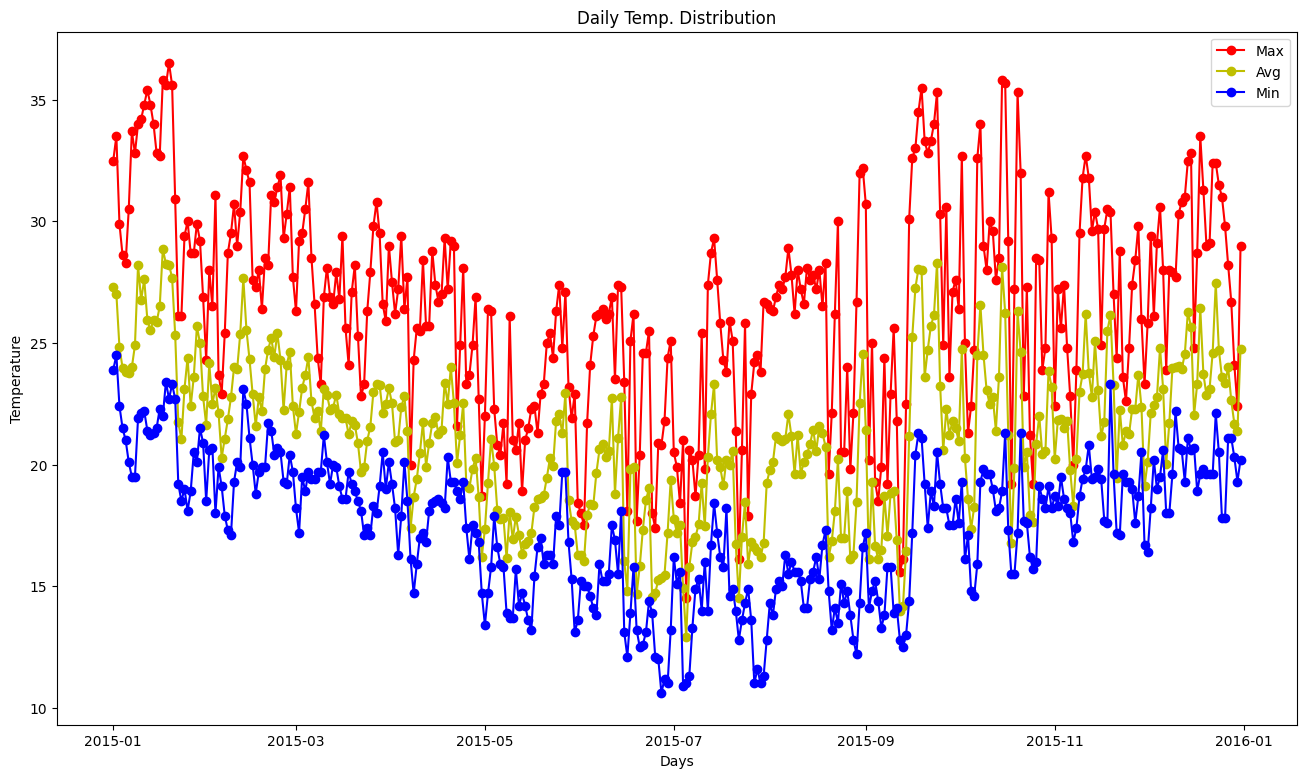

In [20]:
plt.figure(figsize=(16,9))
plt.plot(beer_cons["Date"],beer_cons["Maximum Weather Temp."],label="Max",color="r",marker="o")
plt.plot(beer_cons["Date"],beer_cons["Average Weather Temp."],label="Avg",color="y",marker="o")
plt.plot(beer_cons["Date"],beer_cons["Minimum Weather Temp."],label="Min",color="b",marker="o")
plt.title("Daily Temp. Distribution")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.show()

#### After analysing the last daily plot we concluded that evaluation per day is too messy and hard to understand, not intuitive. So we need a monthly average of all values. To do that we will use the group by function of Pandas and also take advantage of the fact that we already converted the date column into the datetime format so we can use the grouper function to help us to do the filtering by month.

In [21]:
monthly_data = beer_cons.groupby(pd.Grouper(key="Date", freq="M")).mean()
monthly_data

,Average Weather Temp.,Minimum Weather Temp.,Maximum Weather Temp.,Precipitation,Weekend,Beer Consumption
Date,,,,,,
2015-01-31,25.218065,21.148387,31.490323,5.038710,0.290323,28.677645
2015-02-28,23.555000,19.935714,29.007143,9.750000,0.285714,25.673143
2015-03-31,22.167097,19.012903,27.248387,10.732258,0.290323,25.036387
2015-04-30,20.837333,17.783333,25.966667,3.603333,0.266667,24.624100
2015-05-31,18.596774,15.612903,22.867742,1.635484,0.322581,22.798387
2015-06-30,18.070000,14.073333,23.220000,0.676667,0.266667,23.627067
2015-07-31,17.887097,14.209677,22.832258,2.100000,0.258065,22.572871
2015-08-31,19.900000,14.887097,26.316129,1.019355,0.322581,25.908968
2015-09-30,21.000667,16.620000,26.673333,6.723333,0.266667,25.198133


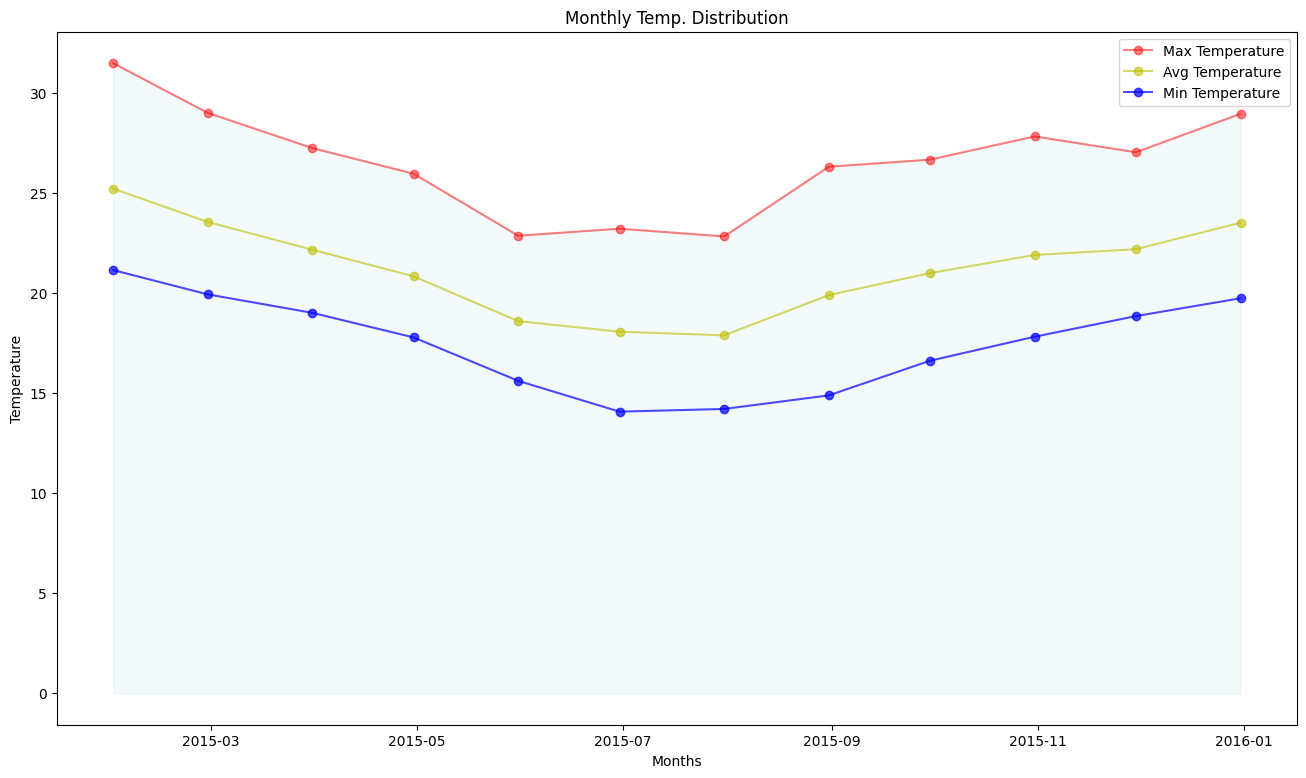

In [22]:
plt.figure(figsize=(16,9))
plt.plot(monthly_data.index,monthly_data["Maximum Weather Temp."],label="Max Temperature",color="r",marker="o", alpha=0.5)
plt.plot(monthly_data.index,monthly_data["Average Weather Temp."],label="Avg Temperature",color="y",marker="o", alpha=0.6)
plt.plot(monthly_data.index,monthly_data["Minimum Weather Temp."],label="Min Temperature",color="b",marker="o", alpha=0.7)
#plt.plot(monthly_data.index,monthly_data["Beer Consumption"],label="Min Temperature",color="k",marker="o", alpha=0.7)
plt.fill_between(monthly_data.index, monthly_data["Maximum Weather Temp."], color="skyblue", alpha=0.1)
plt.title("Monthly Temp. Distribution")
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.legend()
plt.show()

#### The line curve of "Beer Consumption" matches with tropical weather like of the south hemisphere which relates to the geographical location of the city of Sao Paulo when the summer is at the end of the year. 

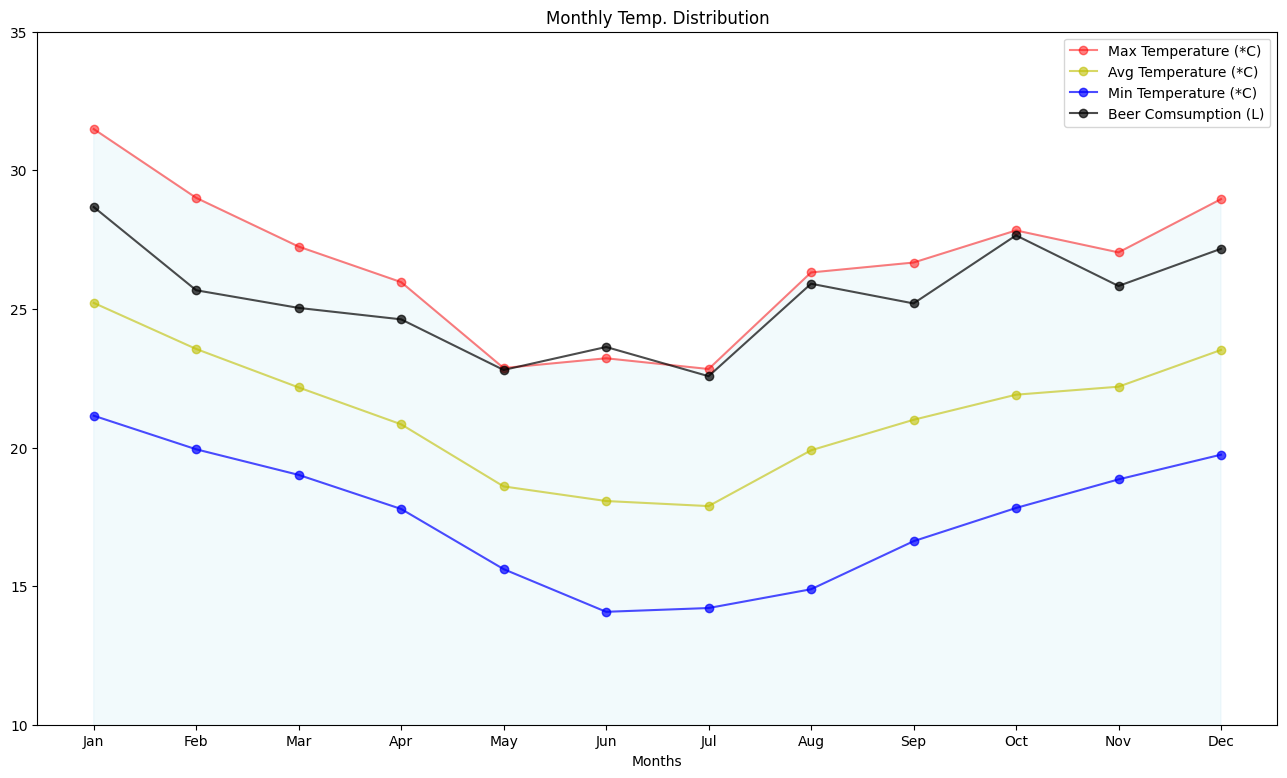

In [23]:
plt.figure(figsize=(16,9))
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Maximum Weather Temp."],label="Max Temperature (*C)",color="r",marker="o", alpha=0.5)
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Average Weather Temp."],label="Avg Temperature (*C)",color="y",marker="o", alpha=0.6)
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Minimum Weather Temp."],label="Min Temperature (*C)",color="b",marker="o", alpha=0.7)
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Beer Consumption"],label="Beer Comsumption (L)",color="k",marker="o", alpha=0.7)
plt.fill_between(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], monthly_data["Maximum Weather Temp."], color="skyblue", alpha=0.1)
plt.title("Monthly Temp. Distribution")
plt.xlabel("Months")
plt.xticks(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
#plt.ylabel("Temperature & Liters")
plt.ylim(10,35)
plt.legend()
plt.show()

#### We notice that in winter times the Temp. drop and so does beer consumption. In June there's a slight change in beer consumption which could be related to the June Winter Festivals that are very common in Brazil, especially in Sao Paulo. Beer consumption follows the tendency to copy the Max. Temp. In July usually, all universities close for the holiday period.

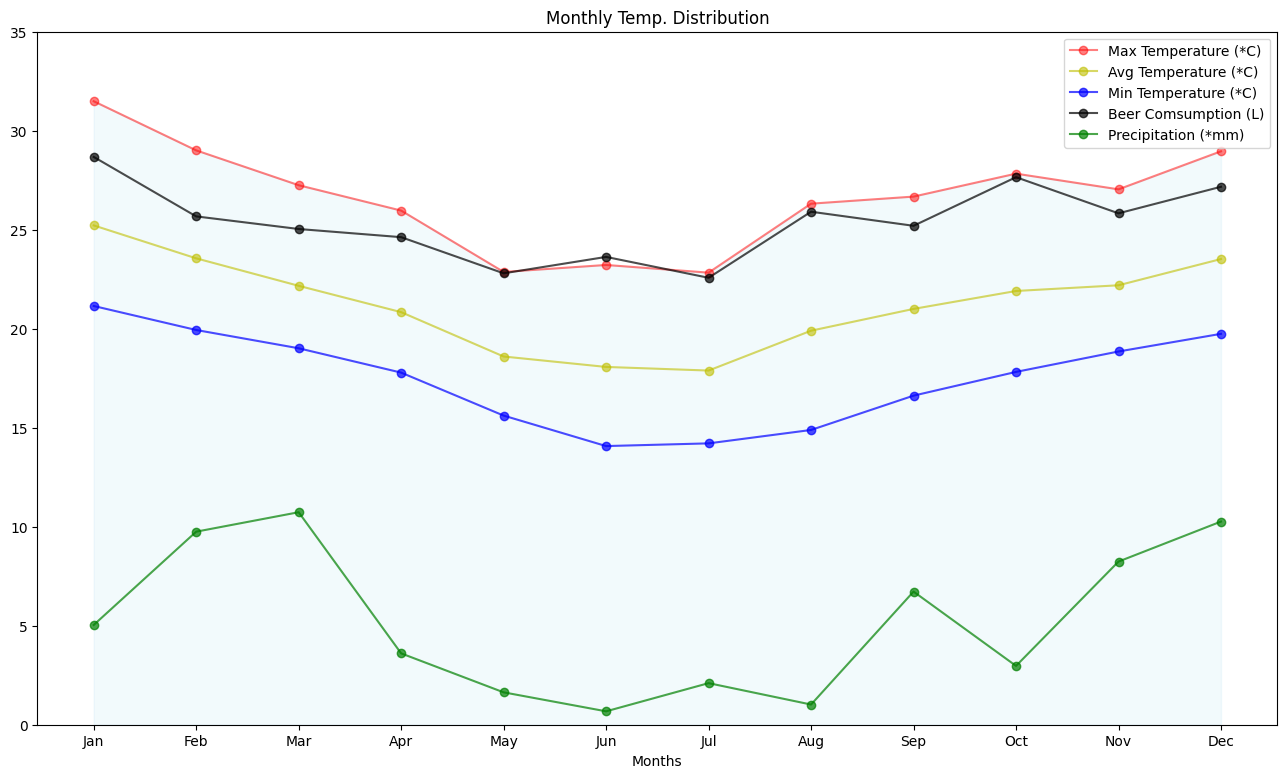

In [24]:
plt.figure(figsize=(16,9))
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Maximum Weather Temp."],label="Max Temperature (*C)",color="r",marker="o", alpha=0.5)
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Average Weather Temp."],label="Avg Temperature (*C)",color="y",marker="o", alpha=0.6)
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Minimum Weather Temp."],label="Min Temperature (*C)",color="b",marker="o", alpha=0.7)
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Beer Consumption"],label="Beer Comsumption (L)",color="k",marker="o", alpha=0.7)
plt.plot(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],monthly_data["Precipitation"],label="Precipitation (*mm)",color="g",marker="o", alpha=0.7)
plt.fill_between(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], monthly_data["Maximum Weather Temp."], color="skyblue", alpha=0.1)
plt.title("Monthly Temp. Distribution")
plt.xlabel("Months")
plt.xticks(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
#plt.ylabel("Temperature & Liters")
plt.ylim(0,35)
plt.legend()
plt.show()

#### The first look at this distribution of Precipitation values during the year might be odd since the coldest months show less rain than the hot months of the year. This can be explained due to the tropical weather of the country.  It is important to remember that this trend of less rainfall in winter does not apply to all regions of Brazil, especially in the South and Southeast regions.
#### Adding the Precipitation in the graph we can generally see that more rain less beer consumption.

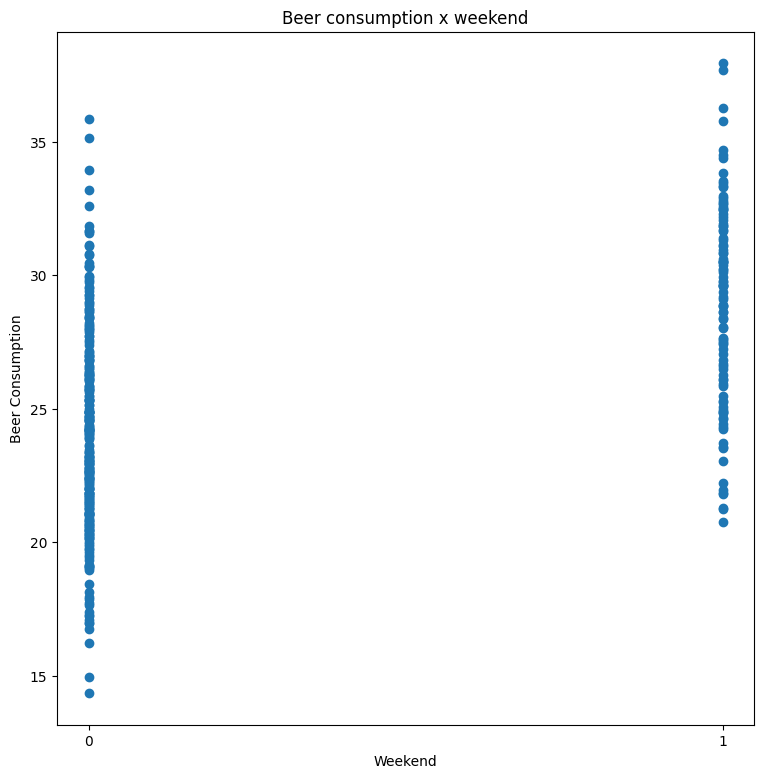

In [25]:
plt.figure(figsize=(9,9))
plt.scatter(beer_cons["Weekend"],beer_cons["Beer Consumption"])
plt.title("Beer consumption x weekend")
plt.xlabel("Weekend")
plt.ylabel("Beer Consumption")
plt.xticks([0,1])
plt.show()

#### We notice that a higher amount of beer consumption over the weekend hitting picks of more than 35 liters and over the week lower levels of beer consumption. Let's now do a more intuitive visualization using a pie chart 3D with Explode. 

In [26]:
weekend_group = beer_cons.groupby("Weekend")["Beer Consumption"].mean()
weekend_group

Weekend
0.0    23.998222
1.0    28.922721
Name: Beer Consumption, dtype: float64

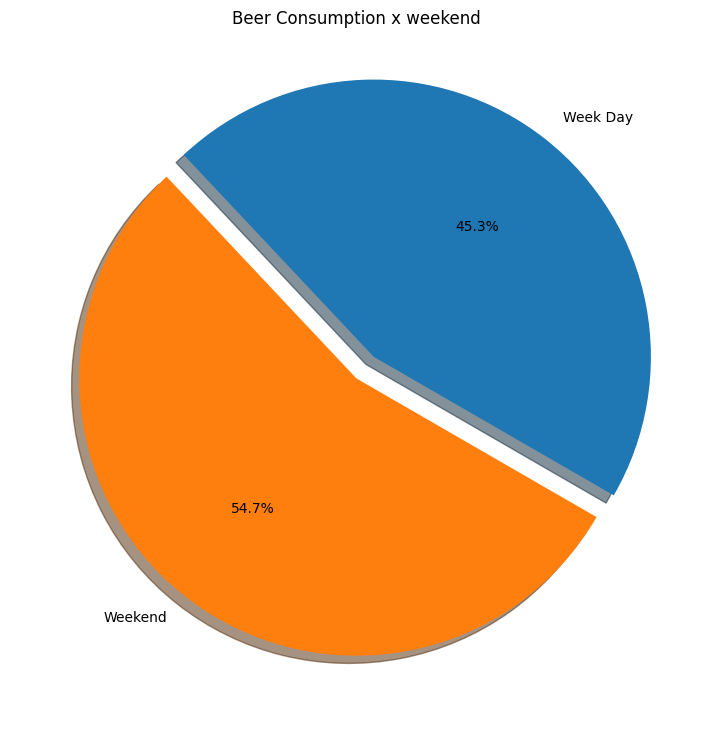

In [27]:
plt.figure(figsize=(9,9))
plt.pie(weekend_group,labels=["Week Day", "Weekend"],autopct="%1.1f%%", shadow=True, explode=[0.1,0], startangle=-30)
plt.title("Beer Consumption x weekend")
plt.show()

#### It's possible to see in this graph that the % of beer consumption is higher over the weekend

#### In terms of Data Analysis there's not much to conclude, now we will do a time series forecast (Temporal Analisis) for Beer Consumption based on the Date
#### To do this we need to select only the column that we want to predict (Beer Consumption) and Data column, and we need to make sure the data column is set as an index of the dataframe since this is the wat for the data to be formated to perform time series 

In [28]:
time_series_analisis = beer_cons[["Date", "Beer Consumption"]]
time_series_analisis.set_index("Date", inplace=True)
time_series_analisis

,Beer Consumption
Date,
2015-01-01,25.461
2015-01-02,28.972
2015-01-03,30.814
2015-01-04,29.799
2015-01-05,28.900
...,...
2015-12-27,32.307
2015-12-28,26.095
2015-12-29,22.309


#### Now that the date is formatted correctly we need to do the train test split to ensure that we can train the model and test the model on unseen data

In [29]:
train_size = int(len(time_series_analisis)*0.9)
train_data_set = time_series_analisis[:train_size]
test_data_set = time_series_analisis[train_size:]

In [30]:
model = ARIMA(train_data_set, order=(5,1,0))
train_model = model.fit()
train_model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Beer Consumption   No. Observations:                  328
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -927.266
Date:                Sat, 17 Aug 2024   AIC                           1866.531
Time:                        10:04:07   BIC                           1889.271
Sample:                    01-01-2015   HQIC                          1875.605
                         - 11-24-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5363      0.057     -9.480      0.000      -0.647      -0.425
ar.L2         -0.5082      0.060     -8.491      0.000      -0.625      -0.391
ar.L3         -0.3536      0.068     -5.182      0.000      -0.487      -0.220
ar.L4         -0.3302      0.063     -5.236      0.000      -0.454      -0.207
ar.L5         -0.2553      0.057     -4.479      0.000      -0.367      -0.144
sigma2        16.9587      1.340     12.658      0.000      14.333      19.585
===================================================================================
Ljung-Box (L1) (Q):                   2.24   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.13   Prob(JB):                         0.58
Heteroskedasticity (H):               1.14   Skew:                             0.14
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
predictions = train_model.forecast(steps=len(test_data_set))
test_data_set["Predictions"] = predictions

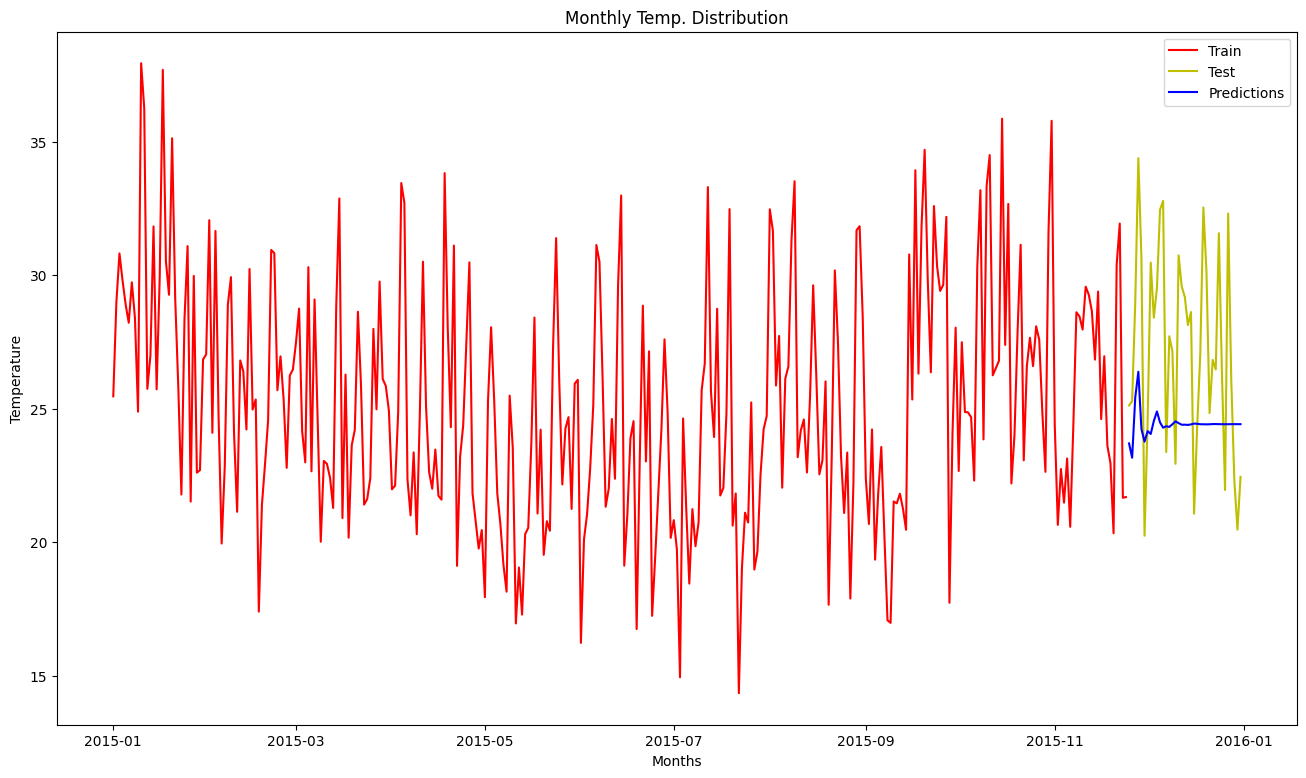

In [32]:
plt.figure(figsize=(16,9))
plt.plot(train_data_set.index,train_data_set["Beer Consumption"],label="Train",color="r")
plt.plot(test_data_set.index,test_data_set["Beer Consumption"],label="Test",color="y")
plt.plot(test_data_set.index,test_data_set["Predictions"],label="Predictions",color="b")
plt.title("Monthly Temp. Distribution")
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.legend()
plt.show()

#### After predictions analysis we can see that the forecast is not quite real, however, it is within roughly the same values witch shows some accuracy, its result promising given more data to train and perhaps trying different time series algorithms.

#### We will make AI predictions using regression models, this type of algorithm doesn't support the dates in the format we have so we need to be creative on how to handle this type of data or not use it at all and only focus on the other features. However from what we see so far we believe the month could be a good predictor for beer consumption so we will be using that as a feature. 

In [33]:
beer_cons["Month"] = beer_cons["Date"].dt.month
beer_cons

,Date,Average Weather Temp.,Minimum Weather Temp.,Maximum Weather Temp.,Precipitation,Weekend,Beer Consumption,Month
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1
...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,12
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,12
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,12
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,12


#### Now that we have the month column we need to split our data into outcome and features

In [34]:
X = beer_cons.drop(columns=["Date", "Beer Consumption"]) #features dataframe
X

,Average Weather Temp.,Minimum Weather Temp.,Maximum Weather Temp.,Precipitation,Weekend,Month
0,27.30,23.9,32.5,0.0,0.0,1
1,27.02,24.5,33.5,0.0,0.0,1
2,24.82,22.4,29.9,0.0,1.0,1
3,23.98,21.5,28.6,1.2,1.0,1
4,23.82,21.0,28.3,0.0,0.0,1
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,12
361,22.64,21.1,26.7,0.0,0.0,12
362,21.68,20.3,24.1,10.3,0.0,12
363,21.38,19.3,22.4,6.3,0.0,12


In [35]:
y = beer_cons["Beer Consumption"] #outcome series
y

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Beer Consumption, Length: 365, dtype: float64

#### now we can do the train test split


In [36]:
from sklearn.model_selection import train_test_split

#### This line of code is central to preparing your data for machine learning. It's using a function called train_test_split to divide your dataset into two crucial parts: 1. Training Set: (X_train, y_train) - This is the portion of your data that the machine learning model will learn from. It's like the textbook for the model. 2. Testing Set: (X_test, y_test) - This is the portion of your data that you'll use to evaluate how well your model has learned. It's like the final exam.
#### Why it's Important: Splitting your data is vital to prevent a problem called "overfitting." Overfitting happens when a model learns the training data too well, including its noise or random fluctuations. This makes it perform poorly on new, unseen data (like your testing set). By having a separate testing set, you get a realistic estimate of how your model will generalize to new data in the real world. In essence: This single line of code is setting the stage for building and evaluating a good machine learning model.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [38]:
from sklearn.linear_model import LinearRegression

#### this is the model initialization 

In [39]:
model = LinearRegression()

#### this is the model training

In [40]:
model.fit(X_train, y_train)

LinearRegression()

#### testing and evaluating the models performance, metrics that verify is the model is working properly

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
y_prediction = model.predict(X_test)
y_prediction

array([27.90391363, 16.72412824, 24.57471606, 21.42673022, 27.30320283,
       24.70195703, 25.79750909, 26.77694722, 25.19598665, 21.885036  ,
       25.95757637, 21.76085157, 26.96960525, 25.08035683, 23.68568124,
       26.39320436, 29.04881978, 24.7018952 , 28.21047445, 27.81734645,
       19.87964309, 22.78917109, 26.42115907, 20.38639259, 24.44736617,
       24.19824393, 26.73696471, 28.94037456, 18.72807598, 22.13138581,
       23.40064821, 25.33349086, 20.30761325, 20.40770008, 31.43450426,
       23.52825735, 29.13387351, 30.14365834, 28.08012928, 23.85585023,
       24.27434371, 24.64901635, 29.09085006, 23.94469695, 24.9420925 ,
       20.88925795, 28.5570621 , 20.4124819 , 23.69221145, 24.7088305 ,
       20.88449605, 32.25129633, 24.3077717 , 30.51055418, 18.51567395,
       24.86578886, 22.29605274, 23.46713382, 27.39887847, 29.99953166,
       22.20418922, 19.87858056, 20.82591294, 30.13132792, 25.48467533,
       27.51137889, 20.27604631, 22.8726293 , 24.11346413, 19.69

In [43]:
mse = mean_squared_error(y_test, y_prediction)
mse

4.690792233856986

In [44]:
r2 = r2_score(y_test, y_prediction)
r2


0.7597613792767695

#### 4.6 shows a good result since is a value close to 0 and the r2 which is the error model prediction is almost 0 which means the linear regression model is working quite well for the beer consumption dataset 

#### Now since we already have a train model with a good performance, we can play around with some mock data and understand how the beer consumption is affected by varying each feature such as Month or the Temperature.

In [45]:
print(X.columns.to_list())
model.predict([[25, 14, 30, 45, 0, 11]])


['Average Weather Temp.', 'Minimum Weather Temp.', 'Maximum Weather Temp.', 'Precipitation', 'Weekend', 'Month']


array([23.82045135])

#### To predict the beer consumption using linear regresion we choose a random 'Average Weather Temp.', 'Minimum Weather Temp.', 'Maximum Weather Temp.', 'Precipitation', 'Weekend', 'Month' with these numbers: 25, 14, 30, 45, 0, 11, and the model predict 23.8L of beer consumption.

In [46]:
month_list = range(1,13)
beer_predicts = []
for month in month_list:
    beer_predicted = model.predict([[25, 14, 30, 45, 0, month]])
    beer_predicts.append(beer_predicted[0])

beer_predicts

[22.496286659405953,
 22.628703128931658,
 22.76111959845736,
 22.893536067983064,
 23.025952537508765,
 23.15836900703447,
 23.29078547656017,
 23.42320194608587,
 23.555618415611576,
 23.688034885137277,
 23.820451354662982,
 23.952867824188683]

#### We now predict the beer consumption for the remaining months at the same time and we will plot the results for visual aid 

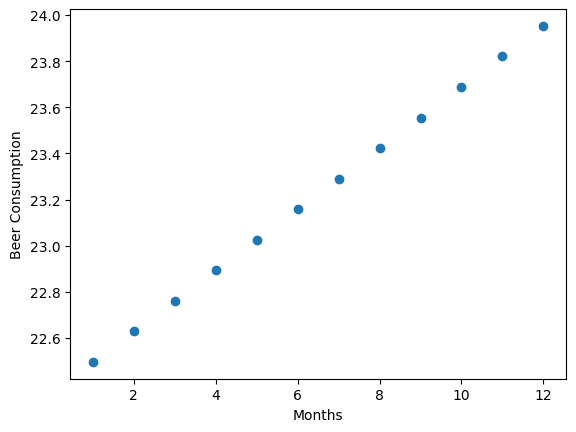

In [47]:
plt.scatter(month_list,beer_predicts)
plt.xlabel("Months")
plt.ylabel("Beer Consumption")
plt.show()

#### this graph makes sense because we use linear regression and we can see a linear relationship between months and beer consumption 